# Image Classifier using Keras Sequential API

## Setup and Loading Data

In [6]:
import tensorflow as tf
import os

In [7]:
## Limiting Tensorflow from using all of the VRAM aka OOM error ( Out Of Memory Error)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Removing dodgy Images

In [21]:
import cv2
import imghdr

In [22]:
data_dir = "customdata"

In [23]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] #various image extensions 

In [24]:
#listing all the images in a directory ---  os.listdir(os.path.join(data_dir,'adidas'))

for image_class in os.listdir(data_dir): #list the directories -- here adidas and nike
    for image in os.listdir(os.path.join(data_dir,image_class)): # list the images in the folder
        image_path = os.path.join(data_dir,image_class, image)  # Getting the path of each image
        try:
            img = cv2.imread(image_path) # Reading the image
            tip = imghdr.what(image_path) # Checking the type
            if tip not in image_exts: #if it's not in the format we want
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path) #removing the image 
        except Exception as e:
            print("Issues with image {}".format(image_path))


Image not in ext list customdata\heels\-1117Wx1400H-460729125-black-MODEL.jpg
Image not in ext list customdata\heels\-1117Wx1400H-460793047-pink-MODEL.jpg
Image not in ext list customdata\heels\-473Wx593H-460604028-black-MODEL.jpg
Image not in ext list customdata\heels\07b35210-a14d-4959-92a4-74ed8a2e7c5b1640159515887ShezoneCream-ColouredStilettoPumps1.jpg
Image not in ext list customdata\heels\1600247526_heels.jpg
Image not in ext list customdata\heels\192px.svg
Image not in ext list customdata\heels\493616266-H.webp
Image not in ext list customdata\heels\bf315d25-2cbf-4d11-ace9-999091441c96.jpg
Image not in ext list customdata\heels\c9d231658817657591-ZAPATOZ-Women-Pink-Printed-Block-Heels-1611658817657165-1.jpg
Image not in ext list customdata\heels\cfd17be579624519a85ffa0118448875.jpg
Image not in ext list customdata\heels\content_4.jpg
Image not in ext list customdata\heels\jnb42ig8_heels650_625x300_29_August_22.jpg
Image not in ext list customdata\heels\red-shiny-heels-shoes_8262

### Loading Data

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#Keras util which process your data 
data = tf.keras.utils.image_dataset_from_directory("customdata")

Found 290 files belonging to 2 classes.


In [58]:
data_iterator = data.as_numpy_iterator()

In [59]:
#Getting a batch of images from the iterator
#batch contains images, labels 
batch = data_iterator.next()

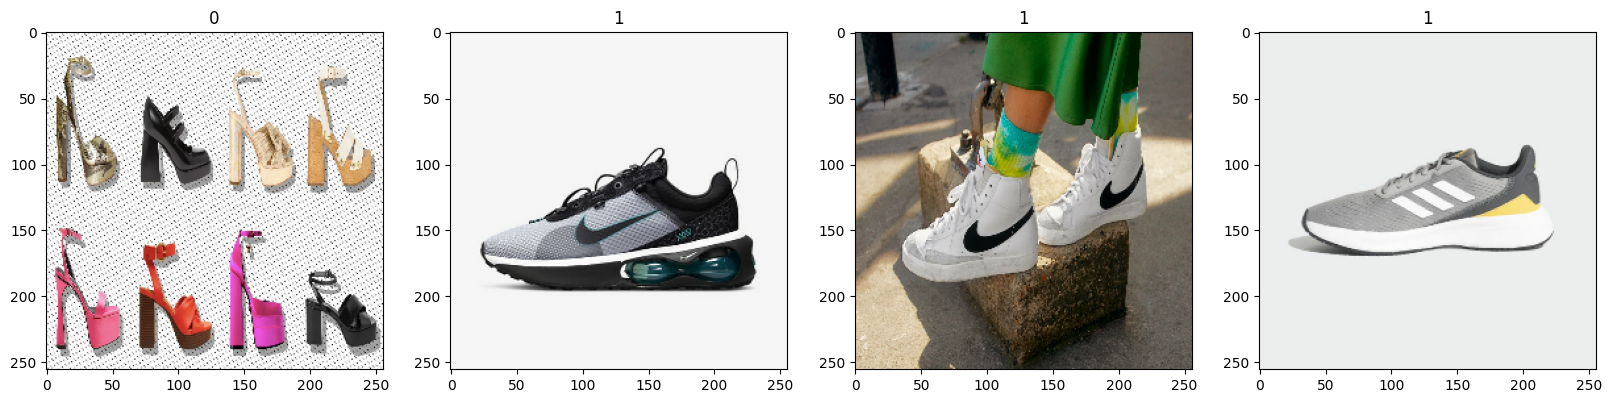

In [60]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 1 = Shoes
Class 0 = Heels

## Preprocessing Data

In [61]:
#Normalizing our images
data = data.map(lambda x,y: (x/255, y))

In [62]:
scaled_iterator = data.as_numpy_iterator()

In [63]:
batch = scaled_iterator.next()

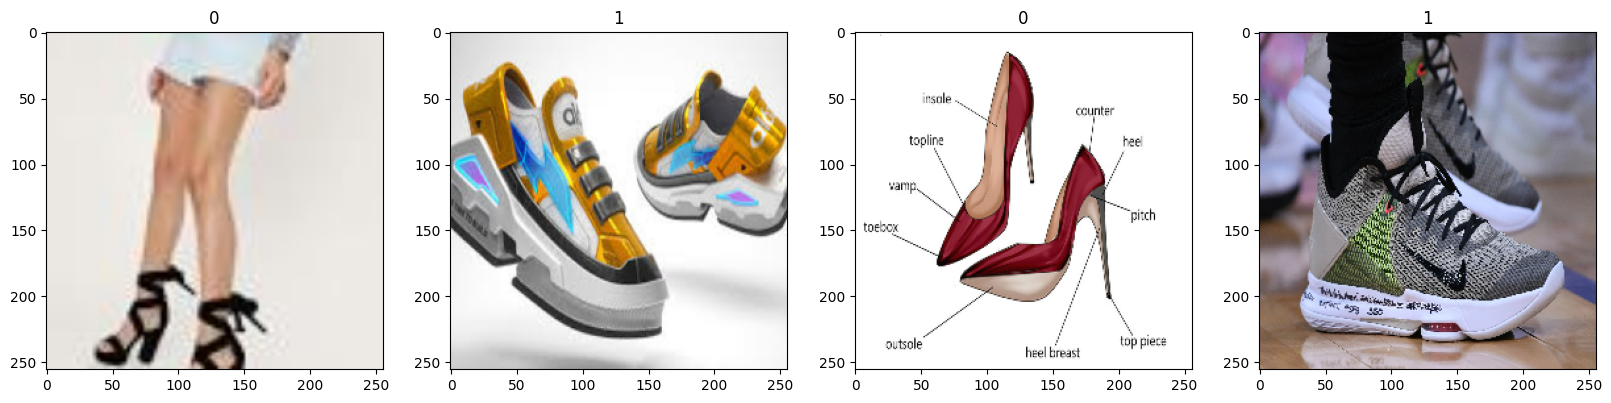

In [64]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [65]:
len(data)

10

In [66]:
## Spilting Data

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [69]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Model 

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [72]:
model = Sequential()

In [73]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [76]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [78]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 1.6380 - accuracy: 0.5089 - val_loss: 0.7769 - val_accuracy: 0.3438
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6851 - accuracy: 0.5446 - val_loss: 0.5763 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.6071 - accuracy: 0.6786 - val_loss: 0.5795 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.5106 - accuracy: 0.8348 - val_loss: 0.3677 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 18s 2s/step - loss: 0.3846 - accuracy: 0.8661 - val_loss: 0.9351 - val_accuracy: 0.5312
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.4687 - accuracy: 0.7634 - val_loss: 0.3811 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 12s 1s/step - loss: 0.3814 - accuracy: 0.8348 - val_loss: 0.2845 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

## Plotting 

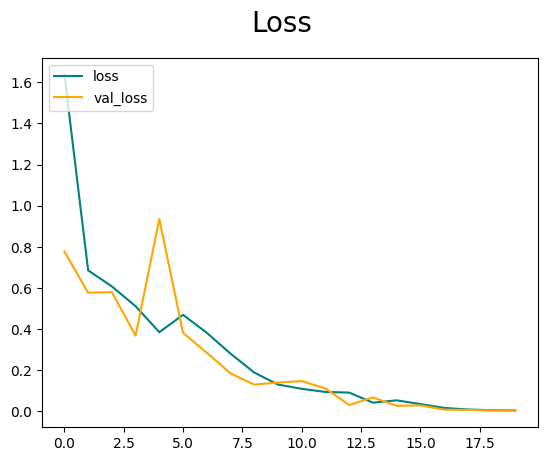

In [79]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

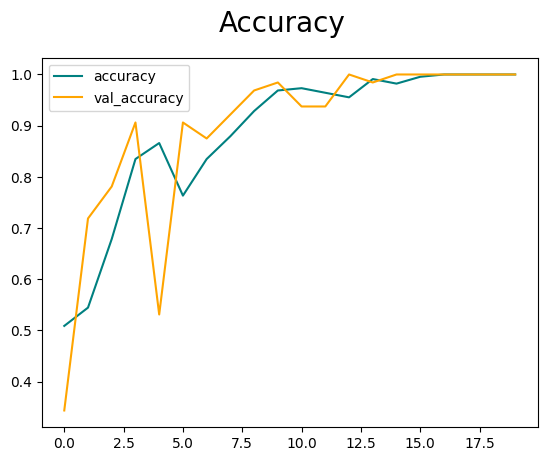

In [80]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation

In [81]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [82]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [83]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 279ms/step


In [84]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Testing

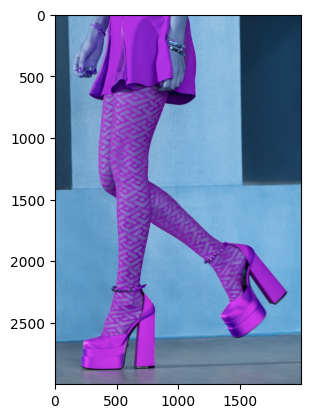

In [99]:
img = cv2.imread('1307379.jpg')
plt.imshow(img)
plt.show()

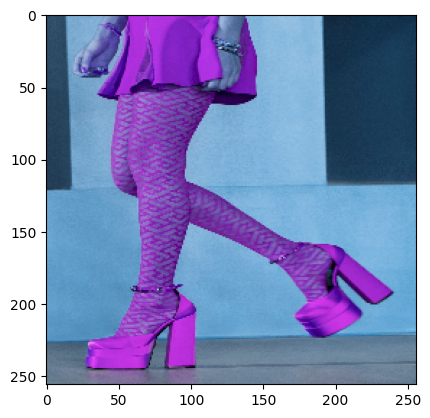

In [100]:
resize_image = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [101]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [102]:
if yhat > 0.5: 
    print(f'Predicted class is Heels')
else:
    print(f'Predicted class is Shoes')

Predicted class is Heels


## Saving the model

In [103]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','imageclassifier.h5'))

new_model = load_model(os.path.join('models','imageclassifier.h5'))

yhat = new_model.predict(np.expand_dims(resize_image/255, 0))

1/1 [==============================] - 0s 74ms/step


In [104]:
if yhat > 0.5: 
    print(f'Predicted class is Heels')
else:
    print(f'Predicted class is Shoes')

Predicted class is Heels
